In [3]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data source

We acquired a dataset from the UCI Machine Learning Repository. Our dataset is a Census Income Data Set, also known as the "Adult" dataset, which was originally extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html. This dataset has both continuous and discrete instances and was initially used to develop an machine learning algorithm to predict the income range of a person. 

In [4]:
adult = pd.read_csv('adult_data.csv', index_col = False)
adult

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data cleaning

In the above data we can notice that we do not have column names assigned for the dataset. It becomes difficult to access and work with data this way. We extract column names from a given  description text file and assign the respective column names to our dataset to be able to work with it further.

In [5]:
with open ('column names.txt', 'r') as file:
    lines = file.readlines()
    column_names=[]
    for line in lines:
        column = line.split()[0].strip(':')
        column_names.append(column)

adult.columns = column_names
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-range
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We have a column named 'fnlwgt' which was introduced to store the final weight values for the initial Machine Learning algorithm. We also have the columns capital-gain, capital-loss. For our analysis we do not need these columns, therefore we are dropping this column. 

In [6]:
adult  = adult.drop(columns = ['fnlwgt','capital-gain','capital-loss'], axis = 1)
adult

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income-range
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


We get rid of any spaces that are present in the categorical columns to avoid any discrepancies while working with specific categories.

In [9]:
adult['workclass'] = adult['workclass'].str.replace(" ", "")
adult['occupation'] = adult['occupation'].str.replace(" ", "")

We check the value counts for various columns and notice that there are some missing values which are denoted by '?' symbol in the columns - workclass(1836), occupation(1843), native-country(556).

In [10]:
adult['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
adult['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

We check the value counts for various columns and notice that there are some missing values which are denoted by '?' symbol in the columns - workclass(1836), occupation(1843), native-country(556). We check for the additional 7 rows where occupation value as '?'. We notice that for all the rows where workclass is 'Never-worked', the occupation values are '?'. This is a logical observation as a person who never worked cannot have an occupation.

In [12]:
adult[adult['workclass'] == '?']

,age,workclass,education,Years-of-Education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income-Range-in-Dollars
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,40,?,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
32530,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32538,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
32540,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [35]:
adult[(adult['workclass'] != '?') & (adult['occupation'] == '?') ]

,age,workclass,education,Years-of-Education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income-Range-in-Dollars
5360,18,Never-worked,10th,6,Never-married,?,Own-child,White,Male,40,United-States,<=50K
10844,23,Never-worked,7th-8th,4,Divorced,?,Not-in-family,White,Male,35,United-States,<=50K
14771,17,Never-worked,10th,6,Never-married,?,Own-child,White,Male,30,United-States,<=50K
20336,18,Never-worked,11th,7,Never-married,?,Own-child,White,Female,10,United-States,<=50K
23231,20,Never-worked,Some-college,10,Never-married,?,Own-child,Black,Male,40,United-States,<=50K
32303,30,Never-worked,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,40,United-States,<=50K
32313,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,4,United-States,<=50K


Since there are 1836 rows for workclass column and 1843 for occupation column that have ? values, it sums up to 5.6% of the total values. Therefore, it would be effective to delete all such rows as these are categorical values and cannot be replaced logically with any other values. 

In [14]:
adult_clean = adult[(adult['workclass'] != '?')& (adult['workclass'] != 'Never-worked')]
adult_clean['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

We replace the ? values in native country column with the value - 'Unknown Native Country' which constitute to just 1.7%

In [15]:
adult_clean['native-country'] = adult_clean['native-country'].replace(' ?','Unknown Native Country')
adult_clean['native-country'].value_counts()


C:\Users\netim\AppData\Local\Temp\ipykernel_21208\3520102636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_clean['native-country'] = adult_clean['native-country'].replace(' ?','Unknown Native Country')


 United-States                 27503
 Mexico                          610
Unknown Native Country           556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

Some of the column names and categorical names that we have are not quite comprehensible. Therefore we rename such names to help get a better understanding of our data. With column name 'education-num' we cannot understand what it means. When we look at the various values in that column we can understand that they are number of years of education, we name the column accordingly. Similarly, we rename some categorical values in workclass column to understand our data better.

In [16]:
adult_clean
adult_clean = adult_clean.rename(columns={"Years-of-Education": "Years_of_Education", "marital-status": "marital_status", "hours-per-week":"hours_per_week", "native-country":"native_country", "Income-Range-in-Dollars":"Income_Range_in_Dollars" })
adult_clean['workclass']=adult_clean['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],['Freelancer','Self-Business'])
adult_clean

,age,workclass,education,Years_of_Education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,Income_Range_in_Dollars
0,50,Freelancer,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In the education column we have several categories, when we observe all values we can see that certain categories can be grouped into a single category. Therefore we group all schooling grades into a single category names school education.

In [17]:
old_edu = list(adult_clean.education.unique())
old_edu

[' Bachelors',
 ' HS-grad',
 ' 11th',
 ' Masters',
 ' 9th',
 ' Some-college',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' 7th-8th',
 ' Doctorate',
 ' Prof-school',
 ' 5th-6th',
 ' 10th',
 ' Preschool',
 ' 12th',
 ' 1st-4th']

In [18]:
adult_clean['education']=adult_clean['education'].replace(dict.fromkeys(['11th','9th','7th-8th','5th-6th','10th','12th','1st-4th','Preschool'],'School Education'), regex=True)
adult_clean.education.unique()

array([' Bachelors', ' HS-grad', ' School Education', ' Masters',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Doctorate',
       ' Prof-school'], dtype=object)

# Sanity Check

As a part of sanity checks, we check if there any negative values present in the numerical value columns. Ideally, we are not supposed to have any negative values as the values represent age, currency and hours.

In [20]:
print('Negative Values in Age:', len(adult_clean.loc[adult_clean.age<0,:]))
print('Negative Values in hours-per-week:', len(adult_clean.loc[adult_clean['hours_per_week']<0,:]))

Negative Values in Age: 0
Negative Values in hours-per-week: 0


We run the describe function for all columns with continous values. This way by checking for the min, max and mean values we can analyze if there is any irrational data present.

In [32]:
adult_clean['hours_per_week'].describe()

count    30717.000000
mean        40.949344
std         11.985576
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [33]:
adult_clean['age'].describe()

count    30717.000000
mean        38.443565
std         13.118441
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [34]:
adult_clean['Years_of_Education'].describe()

count    30717.000000
mean        10.130221
std          2.562458
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: Years_of_Education, dtype: float64

We move 'Workclass' column to the left most column in order to groupby the data from other columns according to 'Workclass'.

In [21]:
cols = adult_clean.columns.tolist()
cols = cols[1:]+cols[:1]
adult_clean = adult_clean[cols]

After performing the above operations, we now have clean data with relevant column names, unwanted columns deleted, spaces removed from categorical values, comprehensive column names, no missing values and required sanity checks performed.

In [24]:
adult_clean

,workclass,education,Years_of_Education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,Income_Range_in_Dollars,age
0,Freelancer,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,50
1,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,38
2,Private,School Education,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,53
3,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,28
4,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,37
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,27
32556,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,40
32557,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,58
32558,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,22


# Data visualization

We plot a Bar graph to look at the values for different categories of workclass. From the graph we can see that most of the people work in private workclass, followed by freelancers and local-gov.

Text(0.5, 0.98, 'Count of Adult workclass')

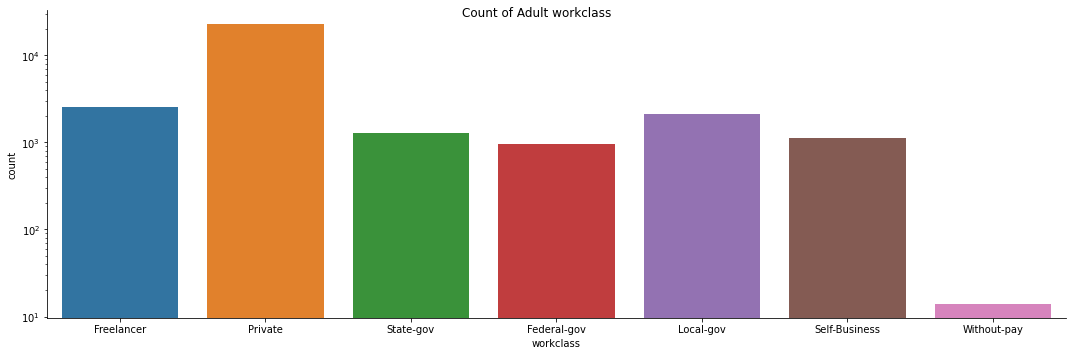

In [22]:
plot = sns.catplot(data= adult_clean, kind = 'count', x = 'workclass', height=5 ,aspect=3, log = True)
plot.fig.suptitle('Count of Adult workclass')

We now plot a graph to understand the relationship between workclass and education. As we already know the highest number of people are in private workclass, we can see the same observation here. Additionally here we can observe that the highest number of people(7000) have a HS grad education and work in private sector, followed by people with some college education in private sector(6000).

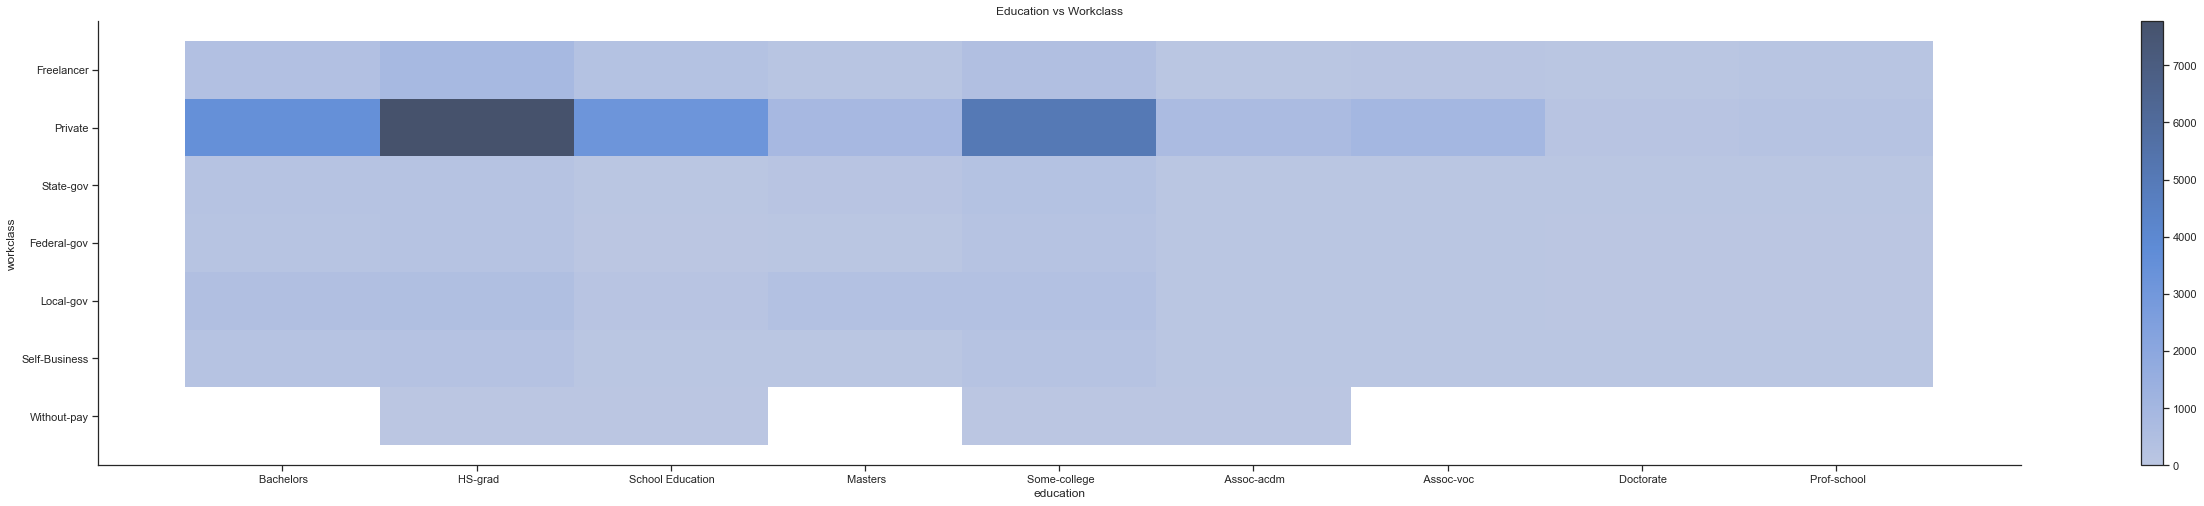

In [41]:
plot= sns.displot(adult_clean, x="education", y="workclass", cbar = True, height=7 ,aspect=5, legend=True).set(title='Education vs Workclass')

In [36]:
hours_comparison = adult_clean.groupby('workclass')['hours_per_week'].mean()


We now plot a boxplot to look at the average hours per week for different workclass categories. We can make the following observations here - 
Majority of people working without pay (volunteer work), work in the range of 20 to approximately 50 hours per week.
People working in the Federal-gov work for a standard of 40 hours.
Majority of private employees work in the range of 40-45 hours per week. There are several outliers in this cateogory, towards both min and max ranges.

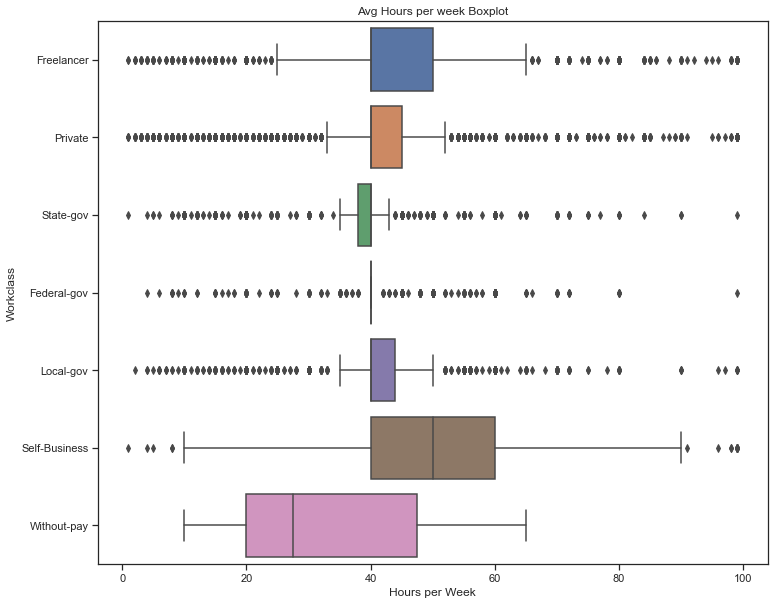

In [30]:
sns.set(rc={"figure.figsize":(12, 10)})
sns.set_style('ticks')
hour_plot = sns.boxplot(y = 'workclass', x = 'hours_per_week', data = adult_clean).set(title='Avg Hours per week Boxplot', xlabel= 'Hours per Week', ylabel = 'Workclass')

In [79]:

adult_clean.groupby(['workclass','Income_Range_in_Dollars'])['id_sum'].count()

workclass      Income_Range_in_Dollars
Federal-gov     <=50K                       589
                >50K                        371
Freelancer      <=50K                      1817
                >50K                        724
Local-gov       <=50K                      1476
                >50K                        617
Private         <=50K                     17733
                >50K                       4963
Self-Business   <=50K                       494
                >50K                        622
State-gov       <=50K                       944
                >50K                        353
Without-pay     <=50K                        14
Name: id_sum, dtype: int64

A bar graph is shown below to look at the income range with respective to the gender of the people. We can clearly observe that in both ranges - less than 50k and more thank 50k, the income is higher more males. This shows a clear pay gap between male and female, irrespective of work class, education and occupation.

<AxesSubplot:title={'center':'Income Range Difference between Males and Females'}, xlabel=' Income Range in Dollars, Sex', ylabel='Percentage of Total Population'>

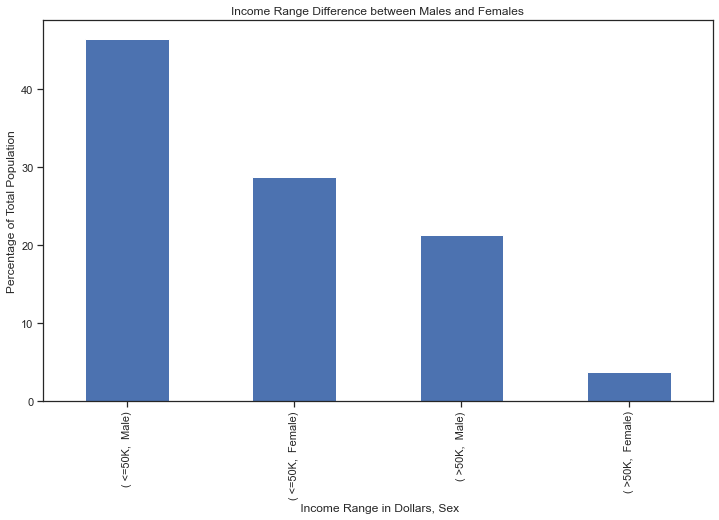

In [38]:
Total = adult_clean['sex'].value_counts().sum()
Total_2 = adult_clean.groupby('Income_Range_in_Dollars')['sex'].value_counts()
Total_2 = Total_2.div(Total).multiply(100)
Total_2.plot(kind = 'bar' , title = 'Income Range Difference between Males and Females', xlabel= ' Income Range in Dollars, Sex', ylabel = 'Percentage of Total Population')

Now we plot a graph to look the count of people working in various occupations, based on their gender. We observe that in all the occupations the number is higher for males, except for the occupation - Adm-clerical and other service. This could be a general observation in the real world, where we see mostly women working as secretaries, assistants or customer attending positions such as receptionists, waitresses, flight attendants etc. Additionally we can observe that for the priv-house servant occupation, there are only female workers.

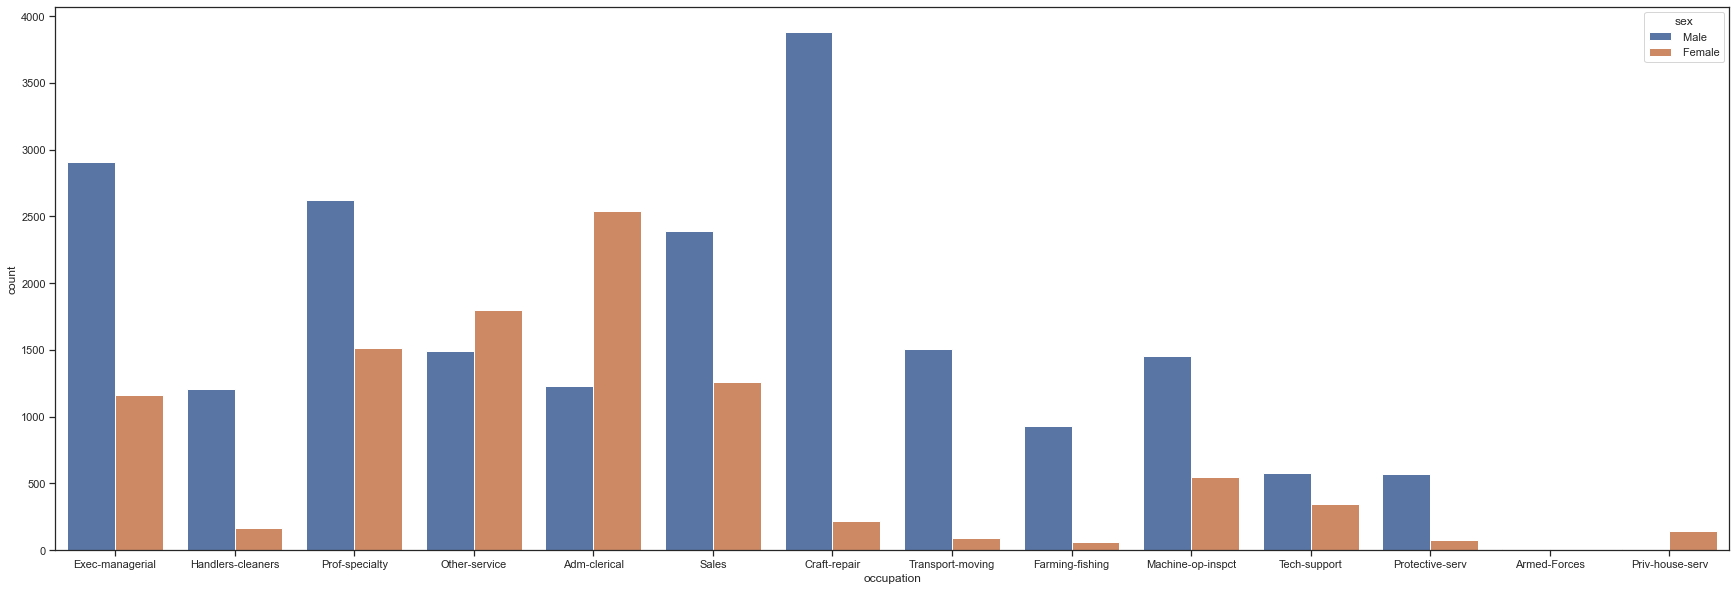

In [85]:
sns.set(rc={"figure.figsize":(30, 10)}) #width=12, #height=7
sns.set_style('ticks')
income_plot = sns.countplot(data=adult_clean, x='occupation',hue='sex')

We then move on to look at the relationship between occupation and age. Through this box plot we can make the following major observations - 
There is a huge range of age observed for priv-house servants where majority of them work from the range of 25 years to approx 57 years of age.
We can also observe that the armed forces age range is limited, starting from 25 yrs of age. And the majority of them lie in the range of 27 years to 34 years of age which is a logical observation.
For Farming-fishing we can observe that the maximum values go upto the highest, compared to other occupations.
For the Exec-managerial we can observe that the majority values lie between 33 to 52 years of age which is the usual age it takes for an employee to reach those positions.

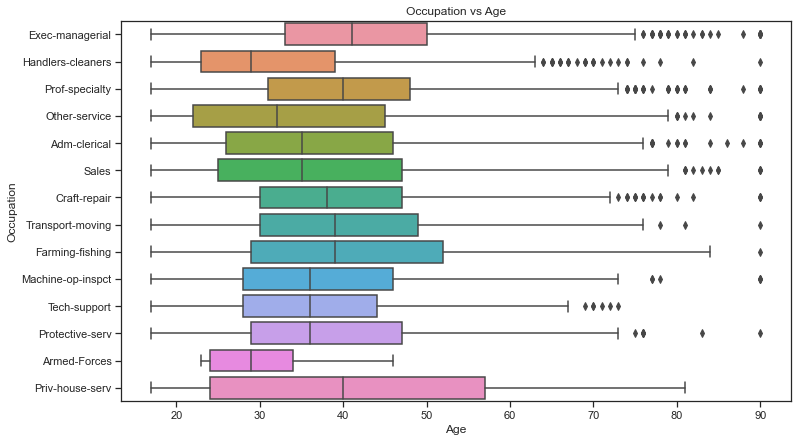

In [30]:
sns.set(rc={"figure.figsize":(12, 7)})
sns.set_style('ticks')

plot = sns.boxplot(y = 'occupation', x = 'age', data = adult_clean).set(title='Occupation vs Age', xlabel= 'Age', ylabel ='Occupation')


The primary observation we could make through the above visualizations we could find relationships between various factors of working adult population. We observe that the most of the work force belongs to the private sector with an education of HS graduates or some college experience. We can also observe that the hours per week is also relatively uniform for the private sector employees. Another major inference drwan is that there is a pay gap between the adult workers. We could also understand the distrubution of males and females in various fields of work.

From this project we learnt how to evaluate what is the most important data from a complete dataset. We understood how to clean and perform sanity checks based on the type of data that we have - continous or categorical. By looking at the different columns and the values in each column could analyze the various possible relations that could be formed from the complete dataset. Once we got the precise understanding of our data, we could perform various visualizations to gain meaningful knowledge from our dataset.